In [190]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [191]:
image = mpimg.imread('warp_sample.jpg')

In [192]:
#%matplotlib notebook
%matplotlib inline

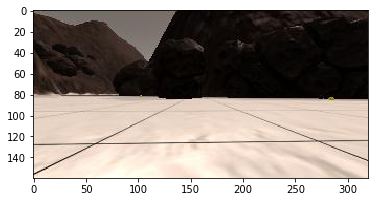

In [193]:
plt.imshow(image)
plt.show()

In [194]:
print(image.shape)

(160, 320, 3)


In [195]:
# Define source and destination points
source = np.float32([[58.79,126.76], [271.01,126.76], [196.85,96.50], [122.54,96.50]])
destination = np.float32([[155,155], [165,155], [165,145], [155,145]])

In [196]:
def perspect_transform(img, src, dst):
    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    
    # Return the result
    return warped

In [197]:
warped = perspect_transform(image, source, destination)

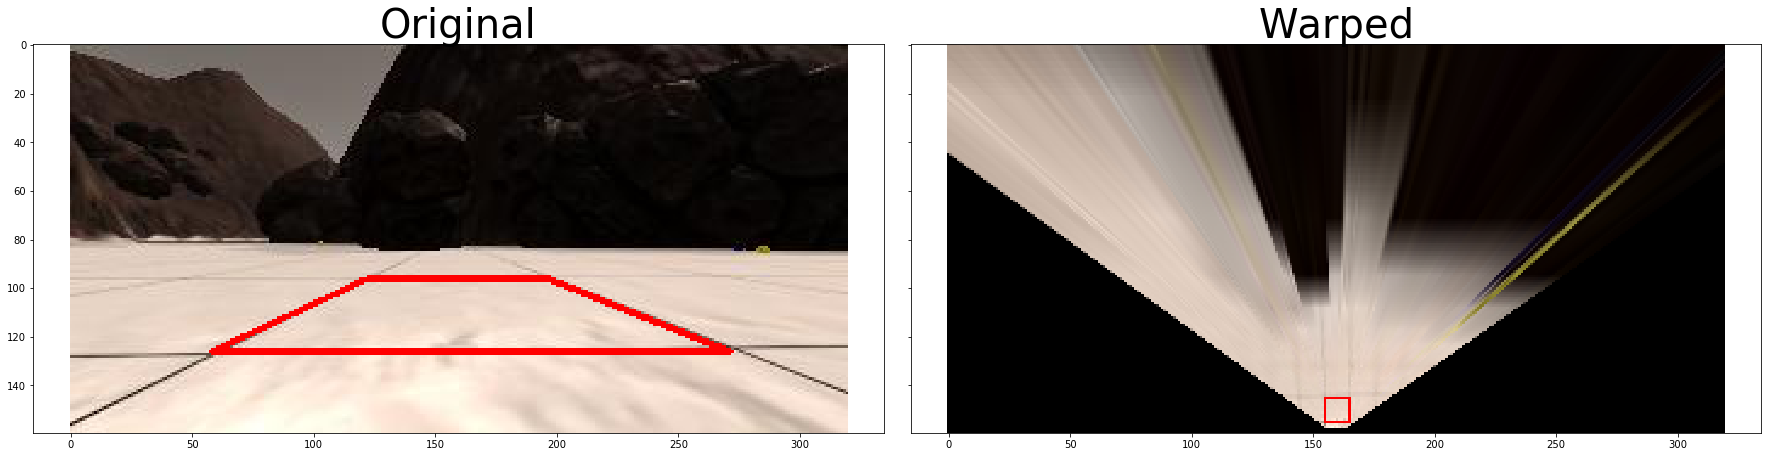

In [199]:
# Draw source and destination points on images before plotting
cv2.polylines(image, np.int32([source]), True, (255, 0, 0), 2)
cv2.polylines(warped, np.int32([destination]), True, (255, 0, 0), 1)

# Display the original image and binary
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original', fontsize=40)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Warped', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()